In [67]:
import numpy as np 
from focus_calibrator import * 
import cv2
import datetime
import os
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('calibrate.avi', fourcc, 20.0, (640, 480))

# Open the default camera
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2.imshow('Video', frame)
    # Write the flipped frame
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
os.system("docker exec openface_docker /home/openface-build/build/bin/FeatureExtraction -f calibrate.avi")

[ WARN:0@32110.579] global cap_gstreamer.cpp:2838 handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module v4l2src22 reported: Cannot identify device '/dev/video0'.
[ WARN:0@32110.579] global cap_gstreamer.cpp:1698 open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@32110.579] global cap_gstreamer.cpp:1173 isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ WARN:0@32110.579] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@32110.579] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range
libdc1394 error: Failed to initialize libdc1394


Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /home/openface-build/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /home/openface-build/build/bin/model/cen_general.txt
Reading the PDM module from: /home/openface-build/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /home/openface-build/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....l

35584

In [65]:
import requests

# URL of the endpoint you're sending the file to
url = 'http://199.98.27.237:8003/upload_calibrate'

# Path to the CSV file you want to send
file_path = 'processed/calibrate.csv'

# Open the file in binary mode
with open(file_path, 'rb') as f:
    # Define the name of the form field (as expected by the server), file name, and file object
    files = {'calibrate_file': (file_path, f)}

    # Make a POST request to upload the file
    response = requests.post(url, files=files)

    # Check the response from the server
    if response.status_code == 200:
        print('File uploaded successfully.')
        print(response.json())  # Print response JSON if the server sends any data back
    else:
        print('Failed to upload file.')
        print(response.text)  # Print error message if something went wrong


File uploaded successfully.
{'message': 'File uploaded successfully', 'path': 'calibrate/calibrate_20240430_145400.csv'}


In [ ]:
import os
import numpy as np 
from focus_calibrator import * 
os.system("docker exec openface_docker /home/openface-build/build/bin/FeatureExtraction -f demo.avi")

In [58]:
from focus_calibrator import * 
gaze_tracker = Focus_Calibrator('processed/calibrate.csv')
gaze_tracker.gaze_angle_xcenter

0.057999999999999996

In [48]:
gaze_scores = gaze_tracker('processed/calibrate.csv')
gaze_scores

array([0.83783784, 0.64864865, 0.62162162, 0.64864865, 0.63513514,
       0.81081081, 0.77027027, 0.78378378, 0.77027027, 0.75675676,
       0.77027027, 0.75675676, 0.71621622, 0.7027027 , 0.7027027 ,
       0.72972973, 0.72972973, 0.90052356, 0.90052356, 0.90052356,
       0.90575916, 0.90575916, 0.90575916, 0.90575916, 0.91623037,
       0.91099476, 0.91099476, 0.93193717, 0.68918919, 0.47297297,
       0.2972973 , 0.18918919, 0.22972973, 0.13513514, 0.10810811,
       0.04054054, 0.        , 0.02702703, 0.        , 0.02702703,
       0.04054054, 0.05405405, 0.09459459, 0.10810811, 0.39189189,
       0.83783784, 0.85135135, 0.63513514, 0.64864865, 0.43243243,
       0.33783784, 0.27027027, 0.24324324, 0.10810811, 0.08108108,
       0.        , 0.01351351, 0.01351351, 0.        , 0.06756757,
       0.06756757, 0.08108108, 0.14864865, 0.14864865, 0.33783784,
       0.77486911, 0.62827225, 0.48691099, 0.34554974, 0.23560209,
       0.12565445, 0.09424084, 0.04188482, 0.02617801, 0.02094

In [61]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('test_vid.avi', fourcc, 20.0, (640, 480))

# Open the default camera
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2.imshow('Video', frame)
    # Write the flipped frame
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
os.system("docker exec openface_docker /home/openface-build/build/bin/FeatureExtraction -f test_vid.avi")



[ WARN:0@30722.599] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1
libdc1394 error: Failed to initialize libdc1394


Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /home/openface-build/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /home/openface-build/build/bin/model/cen_general.txt
Reading the PDM module from: /home/openface-build/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /home/openface-build/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....l

0

In [62]:
gaze_scores = gaze_tracker('processed/test_vid.csv')
np.min(gaze_scores)


gaze_scores



array([0.7539267 , 0.73298429, 0.76439791, 0.7539267 , 0.7486911 ,
       0.76963351, 0.76439791, 0.7486911 , 0.7434555 , 0.7486911 ,
       0.7486911 , 0.7539267 , 0.76439791, 0.76439791, 0.76439791,
       0.7591623 , 0.7539267 , 0.7486911 , 0.7434555 , 0.7539267 ,
       0.7486911 , 0.7434555 , 0.7382199 , 0.7382199 , 0.7382199 ,
       0.7382199 , 0.7382199 , 0.7382199 , 0.7382199 , 0.7434555 ,
       0.7539267 , 0.76963351, 0.7539267 , 0.7539267 , 0.7486911 ,
       0.7382199 , 0.7486911 , 0.7382199 , 0.7382199 , 0.7434555 ,
       0.7382199 , 0.73298429, 0.73298429, 0.73298429, 0.73298429,
       0.72774869, 0.72774869, 0.72774869, 0.73298429, 0.72774869,
       0.73298429, 0.73298429, 0.73298429, 0.72774869, 0.73298429,
       0.72774869, 0.73298429, 0.7382199 , 0.73298429, 0.37837838,
       0.7486911 , 0.7486911 , 0.7486911 , 0.7486911 , 0.7434555 ,
       0.7434555 , 0.7434555 , 0.7434555 , 0.7382199 , 0.7382199 ,
       0.7434555 , 0.7486911 , 0.7382199 , 0.7382199 , 0.73821

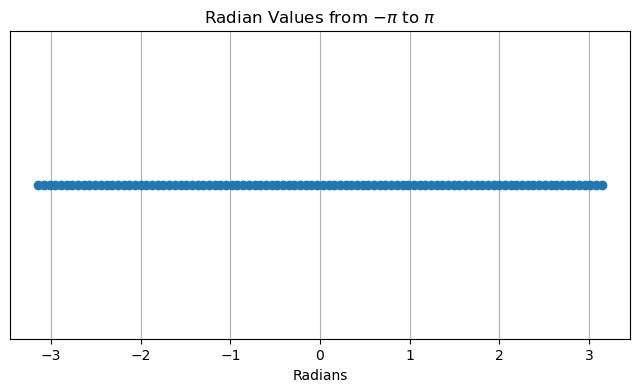

In [12]:

# Release everything if job is finished

In [12]:
import cv2

# Set up the camera
cap = cv2.VideoCapture(0)  # 0 is usually the default camera

if not cap.isOpened():
    print("Error: Camera could not be opened.")
    exit()

# Continuously capture frames from the camera
while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Frame could not be retrieved.")
        breake

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Wait for a key press for 1ms
    key = cv2.waitKey(1) & 0xFF

    # Define actio
# Release everything if job is finishedns based on key press
    if key == ord('u'):
        cv2.imwrite('image_up.jpg', frame)
        print("Saved image_up.jpg")
    elif key == ord('d'):
        cv2.imwrite('image_down.jpg', frame)
        print("Saved image_down.jpg")
    elif key == ord('l'):
        cv2.imwrite('image_left.jpg', frame)
        print("Saved image_left.jpg")
    elif key == ord('r'):
        cv2.imwrite('image_right.jpg', frame)
        print("Saved image_right.jpg")
    elif key == ord('q'):
        # Quit the program when 'q' is pressed
        print("Exiting...")ud
# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

SyntaxError: invalid syntax (318487332.py, line 39)

In [30]:
import numpy as np
import cv2 as cv

# Load gaze scores here, assuming gaze_scores is defined somewhere else
# gaze_scores = ...

# Initialize video capture
cap = cv.VideoCapture('processed/test_vid.avi')
if not cap.isOpened():
    print("Error: Could not open video.")
    exit(1)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
size = (frame_width, frame_height)

# Initialize VideoWriter
result = cv.VideoWriter('output.avi', cv.VideoWriter_fourcc(*'XVID'), 10, size)

index = 0
while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    
    if index >= len(gaze_scores):
        print("Index exceeds length of gaze scores.")
        break

    # Adding gaze score to the frame
    cv.putText(frame, "Gaze Score: " + str(gaze_scores[index]), (50, 50), cv.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)
    
    # Show frame (for debugging, remove or comment out in production)
    cv.imshow('frame', frame)
    result.write(frame)
    
    index += 1
    if cv.waitKey(33) == ord('q'):
        break

cap.release()
result.release()
cv.destroyAllWindows()


Can't receive frame (stream end?). Exiting ...
